In [70]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def rk4DobPend(m1, m2, L1, L2, phi10, phi20, w10, w20, h, t_max, g=9.81):
    """
    m1, L1, phi10, w10 correspond to the mass length, initial angle, and initial angular velocity of the top pendulum
    m2, L2, phi20, w20 correspond to the same, but for the bottom pendulum
    h corresponds to the time step
    t_max corresponds to the greatest amout of time needed to calculate
    """
    
    def f1(t, phi1, phi2, w1, w2):
        return w1
    
    def g1(t, phi1, phi2, w1, w2):
        return -(m2*g)/(m1*L1)*phi2 - (m1+m2)/(m1*L1)*g*phi1
        
        #return (-g*(2*m1+m2)*np.sin(phi1)-m2*g*np.sin(phi1-2*phi2)-2*np.sin(phi1-phi2)*m2*((w2**2)*L2+(w1**2)*L1*np.cos(phi1-phi2))/
               # (L1*(2*m1+m2-m2*np.cos(2*phi1-2*phi2))))
    
    def f2(t, phi1, phi2, w1, w2):
        return w2
    
    def g2(t, phi1, phi2, w1, w2):
        return -(m2/m1+1)*g/L2*phi2 + (m1+m2)/(m1*L2)*g*phi1
        
        #return (2*np.sin(phi1-phi2)*((w1**2)*L1*(m1+m2)+g*(m1+m2)*np.cos(phi1)+(w2**2)*L2*m2*np.cos(phi1-phi2))) \
          #  /(L2*(2*m1+m2-m2-m2*np.cos(2*phi1-2*phi2)))

    
    Nsteps = t_max/h
    t_range = h*np.arange(Nsteps, dtype=np.float64)
    phi1 = np.zeros_like(t_range)
    phi2 = np.zeros_like(t_range)
    w1 = np.zeros_like(t_range)
    w2 = np.zeros_like(t_range)
    y = np.array([phi10, phi20, w10, w20], dtype=np.float64)
    
    A0 = np.zeros(4)
    A1 = np.zeros(4)
    A2 = np.zeros(4)
    A3 = np.zeros(4)
    
    for i, t in enumerate(t_range):
        phi1[i] = y[0]
        phi2[i] = y[1]
        w1[i] = y[2]
        w2[i] = y[3]
        
        k0 = h*f1(t, y[0], y[1], y[2], y[3])
        d0 = h*f2(t, y[0], y[1], y[2], y[3])
        l0 = h*g1(t, y[0], y[1], y[2], y[3])
        q0 = h*g2(t, y[0], y[1], y[2], y[3])
        A0[:] = k0, d0, l0, q0
        
        k1 = h*f1(t + 0.5*h, y[0] + 0.5*k0, y[1] + 0.5*d0, y[2] + 0.5*l0, y[3] + 0.5*q0)
        d1 = h*f2(t + 0.5*h, y[0] + 0.5*k0, y[1] + 0.5*d0, y[2] + 0.5*l0, y[3] + 0.5*q0)
        l1 = h*g1(t + 0.5*h, y[0] + 0.5*k0, y[1] + 0.5*d0, y[2] + 0.5*l0, y[3] + 0.5*q0)
        q1 = h*g2(t + 0.5*h, y[0] + 0.5*k0, y[1] + 0.5*d0, y[2] + 0.5*l0, y[3] + 0.5*q0)
        A1[:] = k1, d1, l1, q1
        
        k2 = h*f1(t + 0.5*h, y[0] + 0.5*k1, y[1] + 0.5*d1, y[2] + 0.5*l1, y[3] + 0.5*q1)
        d2 = h*f2(t + 0.5*h, y[0] + 0.5*k1, y[1] + 0.5*d1, y[2] + 0.5*l1, y[3] + 0.5*q1)
        l2 = h*g1(t + 0.5*h, y[0] + 0.5*k1, y[1] + 0.5*d1, y[2] + 0.5*l1, y[3] + 0.5*q1)
        q2 = h*g2(t + 0.5*h, y[0] + 0.5*k1, y[1] + 0.5*d1, y[2] + 0.5*l1, y[3] + 0.5*q1)
        A2[:] = k2, d2, l2, q2
        
        k3 = h*f1(t + h, y[0] + k2, y[1] + d2, y[2] + l2, y[3] + q2)
        d3 = h*f2(t + h, y[0] + k2, y[1] + d2, y[2] + l2, y[3] + q2)
        l3 = h*g1(t + h, y[0] + k2, y[1] + d2, y[2] + l2, y[3] + q2)
        q3 = h*g2(t + h, y[0] + k2, y[1] + d2, y[2] + l2, y[3] + q2)
        A3[:] = k3, d3, l3, q3
        
        y[:] = y + (A0 + 2*A1 + 2*A2 + A3)/6
    return t_range, phi1, phi2, w1, w2, L1, L2, m1, m2, g

In [71]:
data = rk4DobPend(0.1, 0.1, 0.1, 0.1, 1, 0, 0, 0, 0.0001, 3)
t_range = data[0]
phi1 = data[1]
phi2 = data[2]
w1 = data[3]
w2 = data[4]
L1 = data[5]
L2 = data[6]
m1 = data[7]
m2 = data[8]
g = data[9]

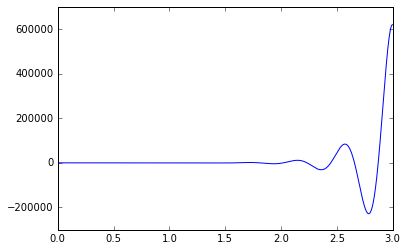

In [73]:
plt.plot(t_range, phi1)

In [59]:
phi1

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])